In [1]:
directory="data/Indian-monuments/images/train"

In [2]:
import os
base_path = os.path.abspath(directory)
class_folders = os.listdir(base_path)
print("Classes (folders):")
for class_name in  class_folders:
    print(class_name)


Classes (folders):
Ajanta Caves
alai_darwaza
alai_minar
basilica_of_bom_jesus
Charar-E- Sharif
charminar
Chhota_Imambara
Ellora Caves
Fatehpur Sikri
Gateway of India
golden temple
hawa mahal pics
Humayun_s Tomb
India gate pics
iron_pillar
jamali_kamali_tomb
Khajuraho
lotus_temple
mysore_palace
qutub_minar
Sun Temple Konark
tajmahal
tanjavur temple
victoria memorial


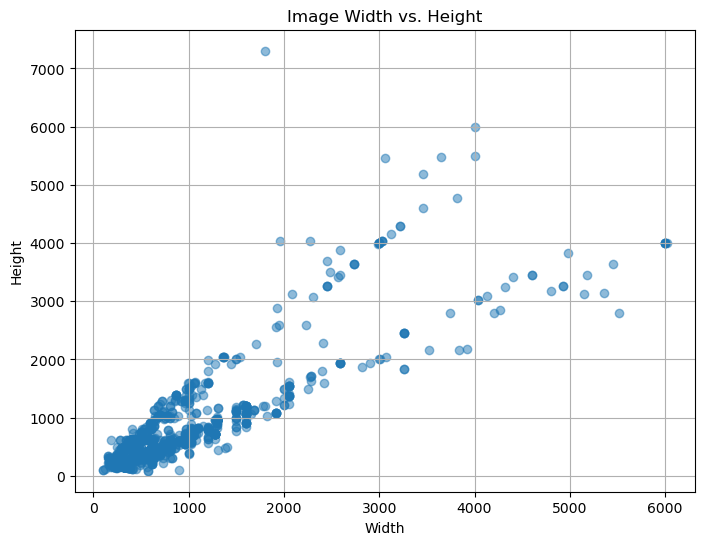

In [3]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

base_path = os.path.abspath(directory)  
class_folders = os.listdir(base_path)

image_sizes = []

for class_name in class_folders:
    class_path = os.path.join(base_path, class_name)
    for image_file in os.listdir(class_path):
        try:
            image_path = os.path.join(class_path, image_file)
            image = tf.keras.preprocessing.image.load_img(image_path)
            width, height = image.size
            image_sizes.append((width, height))
        except:
            pass

image_sizes = np.array(image_sizes)

plt.figure(figsize=(8, 6))
plt.scatter(image_sizes[:, 0], image_sizes[:, 1], alpha=0.5)
plt.title('Image Width vs. Height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()


In [4]:
import tensorflow as tf
from collections import Counter
import numpy as np
base_path = os.path.abspath(directory)  
class_folders = os.listdir(base_path)
images = []
labels = []
class_counts = Counter()
for class_name in class_folders:
    class_path = os.path.join(base_path, class_name)
    for image_file in os.listdir(class_path):
        try:
            image_path = os.path.join(class_path, image_file)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224)) #image sizes varied so resizing.
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(class_name)
            class_counts[class_name] += 1
        except:
            pass

X = np.array(images)
y = labels
print("Images shape:", X[0].shape)
print("Labels:", y)
print("Number of images loaded in each class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Images shape: (224, 224, 3)
Labels: ['Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Aj

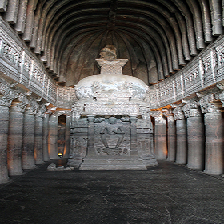

Ajanta Caves


In [5]:
#viewing one of the loaded images
from IPython.display import display
from PIL import Image
image_index = 0
pil_image = Image.fromarray(X[image_index].astype('uint8'))
display(pil_image)
print(y[0])

In [6]:
#image shape
print(X.shape)
print(X[1].shape)

(3746, 224, 224, 3)
(224, 224, 3)


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training, validation, and testing sets
X_train, X_val_test, y_train_encoded, y_val_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)
X_test, X_val, y_test_encoded, y_val_encoded = train_test_split(X_val_test, y_val_test_encoded, test_size=0.5, random_state=42)

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [8]:
print("Train: ", len(X_train),len(y_train_encoded))
print("Test: ", len(X_test),len(y_test_encoded))
print("Val: ", len(X_val),len(y_val_encoded))

Train:  2996 2996
Test:  375 375
Val:  375 375


In [9]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  #multiclass
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=15, batch_size=32, validation_data=(X_val, y_val_encoded))
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/15
94/94 [==============================] - 222s 2s/step - loss: 3.8272 - accuracy: 0.1726 - val_loss: 2.4762 - val_accuracy: 0.3067
Epoch 2/15
94/94 [==============================] - 196s 2s/step - loss: 1.9358 - accuracy: 0.4469 - val_loss: 1.8721 - val_accuracy: 0.4667
Epoch 3/15
94/94 [==============================] - 196s 2s/step - loss: 0.8910 - accuracy: 0.7467 - val_loss: 1.7242 - val_accuracy: 0.6000
Epoch 4/15
94/94 [==============================] - 187s 2s/step - loss: 0.1961 - accuracy: 0.9499 - val_loss: 2.8966 - val_accuracy: 0.5147
Epoch 5/15
94/94 [==============================] - 206s 2s/step - loss: 0.0829 - accuracy: 0.9820 - val_loss: 2.6369 - val_accuracy: 0.5787
Epoch 6/15
94/94 [==============================] - 186s 2s/step - loss: 0.0407 - accuracy: 0.9897 - val_loss: 2.6807 - val_accuracy: 0.5733
Epoch 7/15
94/94 [==============================] - 176s 2s/step - loss: 0.0223 - accuracy: 0.9953 - val_loss: 3.2333 - val_accuracy: 0.5333
Epoch 8/15
94

In [10]:
model.save("try1.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 346112)            0

In [11]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image

image_path = "C:/Users/Charvi Upreti/Documents/GitHub/Unveiling-India-s-Heritage/data/Indian-monuments/images/train/tajmahal/10.jpg"

img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  
predictions = model.predict(img_array)
class_folders = os.listdir(base_path)  
predicted_class_index = np.argmax(predictions)
predicted_class = class_folders[predicted_class_index]

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 411ms/step
Predicted class: tajmahal
